In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
print("Hello World!")

Hello World!


Read Files:
- Use pandas read.csv functions
- pass in "None" so that fetures are from 0 to n
- Notice, for the label (last column):
    - 0 = normal
    - 1 = abnormnal

In [173]:
normal = pd.read_csv("ptbdb_normal.csv", header=None)

abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)

In [174]:
#Normal Shape
normal.shape

(4046, 188)

In [175]:
normal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
#Abnormal Shape
abnormal.shape

(10506, 188)

In [177]:
abnormal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Plotting Explained: 
- .colums => the x-axis will be the column indices (0,1,2,3,4, ...)
- .iloc[i] => acces the ith row of the dataframe
- here, we are plotting 5 different rows (5 different heartbeats)

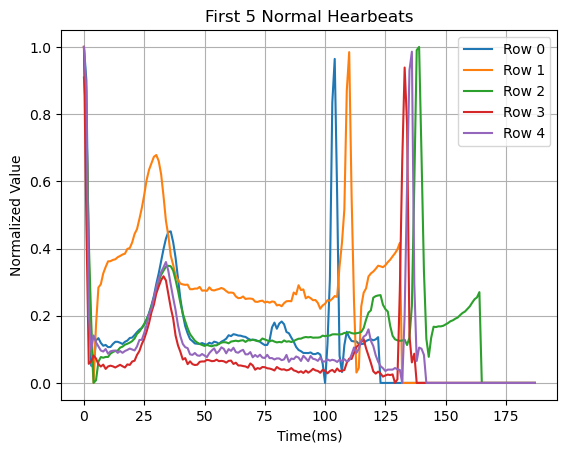

In [178]:
#plot 5 normal
for i in range(5):
    plt.plot(normal.columns, normal.iloc[i], label=f"Row {i}")

plt.title("First 5 Normal Hearbeats")
plt.legend()
plt.grid(True)
plt.xlabel("Time(ms)")
plt.ylabel("Normalized Value")
plt.show()

    

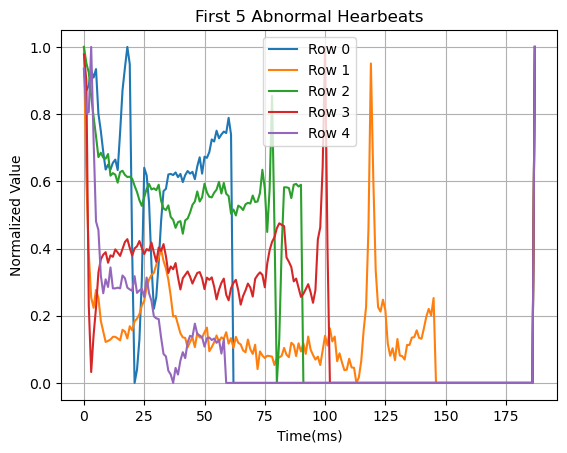

In [179]:
#plot 5 abnormal 
for i in range(5):
    plt.plot(abnormal.columns, abnormal.iloc[i], label=f"Row {i}")

plt.title("First 5 Abnormal Hearbeats")
plt.grid(True)
plt.legend()
plt.xlabel("Time(ms)")
plt.ylabel("Normalized Value")
plt.show()

pd.concat can be used to combine two dataframes:
- axis:
    - =0 combines along rows (appends rows)
    - =1 combines along columns (adds colums)
    - it is set to 0 by default
- join:
    - "outer" includes all indeces/columns from both dataframes
    - "inner" inclides only overlapping indices/columns
    - outer by default
- ignore_index:
    - True resets index in the result
    - False by default

Remember what I said about the very last column, its the labels! 

In [180]:
#Two in one, for funsies
#we ignore_index affects the row labels. if true, it linearly increases with each row, no duplicates

combined = pd.concat( [normal, abnormal], axis=0, ignore_index=True)

combined

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
combined.shape

(14552, 188)

Text(0, 0.5, 'Normalized Value')

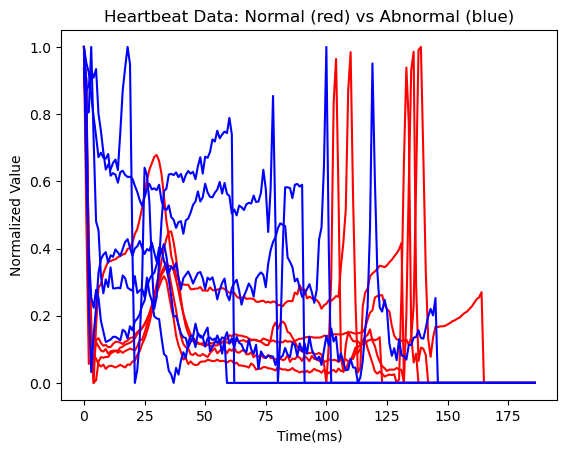

In [182]:
graph_combined = pd.concat([normal.head(5), abnormal.head(5)], axis=0, ignore_index=True)

for i, row in graph_combined.iterrows():
    if row[187] == 0:
        color = 'r'
        plt.plot(row.drop(187), color = color)
    else:
        color = 'b'
        plt.plot(row.drop(187), color = color)

plt.title('Heartbeat Data: Normal (red) vs Abnormal (blue)')
plt.xlabel('Time(ms)')
plt.ylabel('Normalized Value')


Our Datasets are unbalanced, as shown below:

In [183]:
abnormal.shape

(10506, 188)

In [184]:
normal.shape

(4046, 188)

Out normal dataset has about 6 thousand more datapoints! (more rows). If we were to continue and train this model with this unbalanced dataset, the weights and biases of each will favor that of the dominant dataset.

We gotta do something about it. Our options are:
- downsample the dominant dataset to match that of the non-dominant one
- or use the SMOTE technique (Synthetic Minority Oversampling Technique)

We will use SMOTE in this example:
- requires: from imblearn.over_sampling import SMOTE

To begin, get your X and y values as numpy arrays prior to SMOTE:
- X is your rows, all the input data
- y is all of your labels (0 or 1)

In [185]:
X = combined.drop(columns=[187])
X = X.values #.values is an attribute, not a method, therefore no () needed

y = combined[187]
y = y.values

#.values changes it to a numpy array, as it is an attrivbute from pandas

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11641, 187)
(2911, 187)
(11641,)
(2911,)


In [187]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(16858, 187)
(16858,)


Now, time to convert our data into tensors and move on 

In [188]:
X_train = torch.FloatTensor(X_train) #float as ECG data are decimals 
y_train = torch.LongTensor(y_train) #labels are intrgrers, CrossEntropyLoss
                                    #requires labels to be LongTensor
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)


because we used train_test split and our data is relatively small, we dont need a dataloader

In [189]:
class Binary_NN_ECG(nn.Module):
    def __init__(self, input_size= 187, h1 = 256, h2 = 128, h3 = 64, out = 2, dropout_rate = 0.5):
        super().__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, out)

        self.relu = nn.ReLU() # declared here for cleaner forward function
        self.dropout = nn.Dropout(dropout_rate)  # dropout layer with given dropout rate

    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)
       
        return x 


In [190]:
#create an instance of the model
binary_nn_model = Binary_NN_ECG()

#measure on the loss, used cross entropy due to classification
loss_func = nn.CrossEntropyLoss() #this is your critereon

#weight Optimizer
optimizer= torch.optim.Adam(binary_nn_model.parameters(), lr = 0.001)

torch.manual_seed(42)


In [191]:
binary_nn_model

Binary_NN_ECG(
  (fc1): Linear(in_features=187, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [192]:
import time

epochs = 100

train_losses = []
test_losses = []

train_accuracies = []
test_accuracies = []
start_time = time.time()

for i in range(epochs):
    binary_nn_model.train()
    #for confusion matrix
    train_preds = []
    train_truths = []
    test_preds = []
    test_truths = []

    y_pred_train = binary_nn_model(X_train)
    train_loss = loss_func(y_pred_train, y_train)

    train_predicted = torch.argmax(y_pred_train, dim=1)
    train_acc = (train_predicted == y_train).sum().item() / y_train.size(0) * 100

    #stats and stuff
    train_losses.append(train_loss.item())
    train_accuracies.append(train_acc)

    #for consuion matrix
    train_preds.extend(train_predicted.numpy())
    train_truths.extend(y_train.numpy())

    #backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    binary_nn_model.eval()
    with torch.no_grad():
        y_pred_test = binary_nn_model(X_test)
        test_loss = loss_func(y_pred_test, y_test)

        test_predicted = torch.argmax(y_pred_test, dim=1)
        test_acc = (test_predicted == y_test).sum().item() / y_test.size(0) * 100

        #stats and stuff
        test_losses.append(test_loss.item())
        test_accuracies.append(test_acc)

        #for confusion matrix
        test_preds.extend(test_predicted.numpy())
        test_truths.extend(y_test.numpy())

    print(f"Epoch {i+1} / {epochs}")
    print(f"Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")


current_time = time.time()
total = current_time - start_time
print("")
print(f"this took {total} seconds \n")


Epoch 1 / 100
Train Loss: 0.6946, Train Accuracy: 50.4093
Test Loss: 0.6840, Test Accuracy: 72.7929
Epoch 2 / 100
Train Loss: 0.6888, Train Accuracy: 55.3446
Test Loss: 0.6709, Test Accuracy: 73.3081
Epoch 3 / 100
Train Loss: 0.6833, Train Accuracy: 56.4836
Test Loss: 0.6587, Test Accuracy: 75.4036
Epoch 4 / 100
Train Loss: 0.6761, Train Accuracy: 59.2063
Test Loss: 0.6452, Test Accuracy: 75.6441
Epoch 5 / 100
Train Loss: 0.6685, Train Accuracy: 60.6715
Test Loss: 0.6304, Test Accuracy: 73.4112
Epoch 6 / 100
Train Loss: 0.6577, Train Accuracy: 63.2756
Test Loss: 0.6144, Test Accuracy: 72.2432
Epoch 7 / 100
Train Loss: 0.6459, Train Accuracy: 65.5179
Test Loss: 0.5990, Test Accuracy: 71.8653
Epoch 8 / 100
Train Loss: 0.6325, Train Accuracy: 67.5584
Test Loss: 0.5861, Test Accuracy: 70.7661
Epoch 9 / 100
Train Loss: 0.6184, Train Accuracy: 69.2727
Test Loss: 0.5776, Test Accuracy: 69.8042
Epoch 10 / 100
Train Loss: 0.6030, Train Accuracy: 70.4710
Test Loss: 0.5725, Test Accuracy: 69.6668

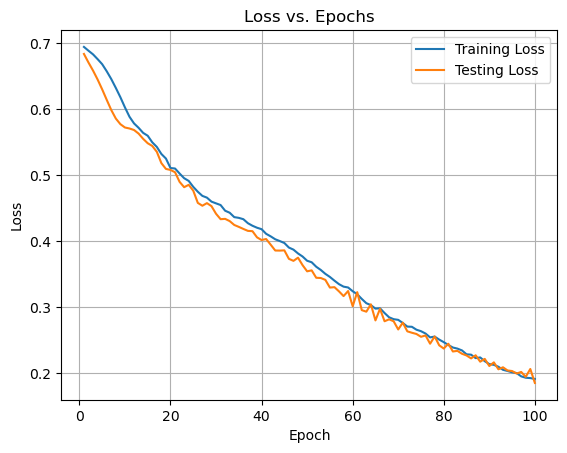

In [193]:
plt.figure()
plt.plot(range(1, epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, epochs+1), test_losses, label="Testing Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

Training Confusion Matrix:
[[8033  396]
 [ 831 7598]]


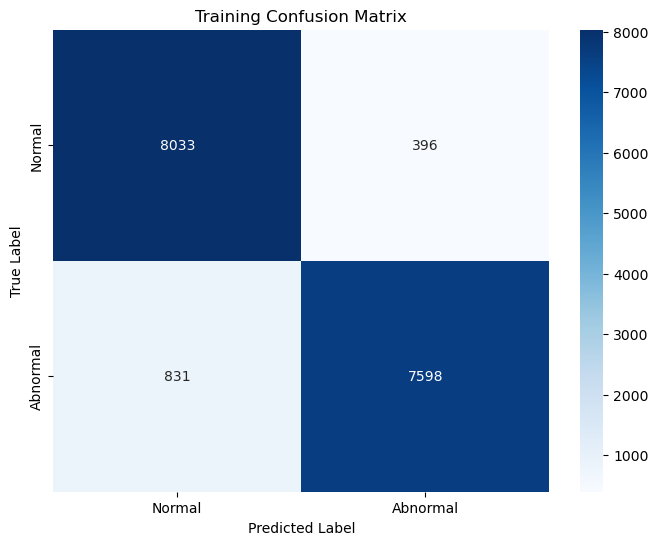

Testing Confusion Matrix:
[[ 754   80]
 [ 119 1958]]


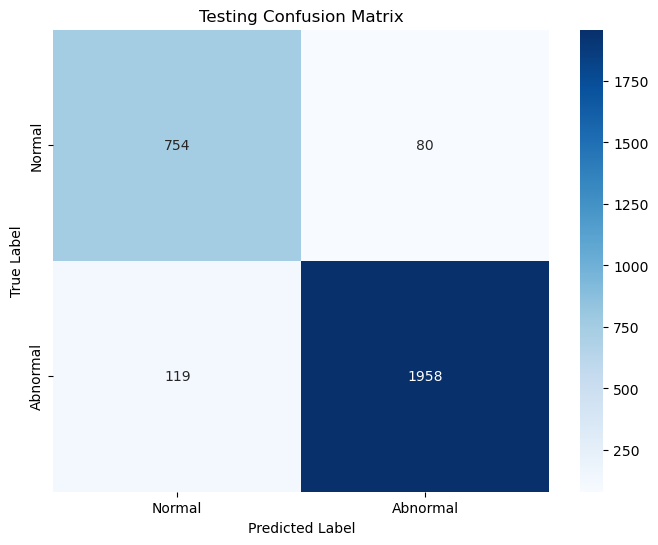

In [194]:
#training confusion matrix
train_cm = confusion_matrix(train_truths, train_preds)
print("Training Confusion Matrix:")
print(train_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#testing confusion matrix
test_cm = confusion_matrix(test_truths, test_preds)
print("Testing Confusion Matrix:")
print(test_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [195]:
#accuracy calculation explanation

print(f"Shape of a prediction: {y_pred_train.shape}\n")
#as you can see from the output, shape is 16858 samples/rows, each with two columns (0,1)
#which represent is its abnormal or normal


#maxval_indecies = torch.argmax(y_pred_train, dim=1)

#. dim 0 is rows, dim 1 is cols
#we picked dim=1, so we are telling pytorch that for each row/sample, find the maximum value accross
#the columns (class scores) and its corresponding index

#indeceis is really just a 1d tensors with predicted classes for the 16858 samples
maxval, indecies = torch.max(y_pred_train,dim=1)

print(f"maxval.shape {maxval.shape}\n")
print(f"maxval: {maxval}\n")

print(f"indeceis shape: {indecies.shape}\n")
print(f"indecies: {indecies}\n")

#indecies == y_train: creates a tensor of booleans indicating whether the prediction matches the ground truth for each sample
#.sum() counts how many True values there are in the boolean tensor. each true is a correc prediction
#we divide this by y_train.size(0) *100 to get our accuracy
#.size() gives the size of the tensor. we pass in 0 to indicate to find the size along the first dimesnion (rows)
#*100 is just to get it into percentage form
accuracy = (indecies == y_train).sum().item() / y_train.size(0) *100

print(f"accuracy: {accuracy:.2f}%")

Shape of a prediction: torch.Size([16858, 2])

maxval.shape torch.Size([16858])

maxval: tensor([6.0581, 2.2091, 6.1243,  ..., 1.5322, 1.5419, 2.8789],
       grad_fn=<MaxBackward0>)

indeceis shape: torch.Size([16858])

indecies: tensor([1, 1, 1,  ..., 0, 0, 0])

accuracy: 92.72%


In [196]:
#grab a random sample from your test data
sample = X_test[2910]
truth = y_test[2910]


#make sure to apply unsqueeze to get into proper format
model_output = binary_nn_model(X_test[2910].unsqueeze(0))

pred = torch.argmax(model_output, dim=1)

print(pred.item())
print(truth.item())

#Note, you can see how argmax and max can be used between this code and the Binary_cnn code
#max returns the pair while argmax just the index (which is what we really care about)

1
1


As you can see, the random sample picked mathes the prediciton of the model (1 being abnormal)